# AtliQ Hotels Data Analysis Project

**PROBLEM STATEMENT**
- Atliq Grands owns multiple five-star hotels across India. They have been in the hospitality
industry for the past 20 years. Due to strategic moves from other competitors and ineffective
decision-making in management, Atliq Grands are losing its market share and revenue in the
luxury/business hotels category. As a strategic move, the managing director of Atliq Grands
wanted to incorporate “Business and Data Intelligence” in order to regain their market share
and revenue.
- However, they do not have an in-house data analytics team to provide them with these
insights. Their revenue management team had decided to hire a 3rd party service provider to
provide them with insights from their historical data.

# Datasets

1. dim_date.csv
2. dim_hotels.csv
3. dim_rooms.csv
4. fact_bookings.csv
5. fact_aggregated_bookings.csv

# Project Goal

The goal of this project is to perform a thorough analysis of the hotel industry using Python, providing data-driven insights and actionable recommendations. By utilizing these insights, the objective is to enable Atliq Grands to make well-informed decisions to regain their competitive edge. This analysis aims to help the company effectively tackle challenges such as declining revenue and loss of market share, guiding them toward sustainable growth and improved market performance.

# Tools & Functions Used:

- **Pandas**: Utilized for efficient data manipulation and analysis, including operations such as `groupby`, `merge`, and statistical summaries using `describe`.
- **Matplotlib**: Employed for visualizing data insights through various charts, including bar charts, pie charts, and line plots.
- **NumPy**: Used for performing numerical operations and creating new variables, such as calculating occupancy percentages.
- **Data Cleaning Techniques**: Ensured data quality by handling missing values, correcting data formats, and removing outliers.

# Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all the files

In [2]:
data_bookings = pd.read_csv(r'C:\Users\ykuma\Downloads\Hospitality data\Dataset\fact_bookings.csv')
df_date = pd.read_csv(r'C:\Users\ykuma\Downloads\Hospitality data\Dataset\dim_date.csv')
df_hotels = pd.read_csv(r'C:\Users\ykuma\Downloads\Hospitality data\Dataset\dim_hotels.csv')
df_rooms = pd.read_csv(r'C:\Users\ykuma\Downloads\Hospitality data\Dataset\dim_rooms.csv')
df_agg_bookings = pd.read_csv(r'C:\Users\ykuma\Downloads\Hospitality data\Dataset\fact_aggregated_bookings.csv')

In [3]:
# Number of rows and columns in each DataFrame which helps in understanding the structure and size of each DataFrame.
print(data_bookings.shape)
print(df_date.shape)
print(df_hotels.shape)
print(df_rooms.shape)
print(df_agg_bookings.shape)

(134590, 12)
(92, 4)
(25, 4)
(4, 2)
(9200, 5)


# Explore data_bookings dataframe

In [4]:
data_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [5]:
print(data_bookings.room_category.value_counts())

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64


In [6]:
print(data_bookings.booking_status.value_counts())

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64


In [7]:
print(data_bookings.booking_platform.value_counts())

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64


In [8]:
# Check for missing value
data_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [10]:
data_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [11]:
data_bookings[data_bookings.no_guests<=0] # Return all records where the number of guests is either zero or a negative value.

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [12]:
data_bookings.property_id.value_counts()

property_id
16559    7338
18562    7333
16563    7147
18560    6638
18561    6458
17563    6337
17559    6142
17560    6013
19560    5979
19562    5812
19561    5736
19563    5413
18559    5256
17561    5183
17558    5036
16562    4820
18563    4728
19559    4705
16560    4693
18558    4475
16561    4418
19558    4371
17564    3982
17562    3424
16558    3153
Name: count, dtype: int64

C:\Users\ykuma\AppData\Local\Temp\ipykernel_18728\824278047.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_bookings['revenue_generated'])


<Axes: xlabel='revenue_generated', ylabel='Density'>

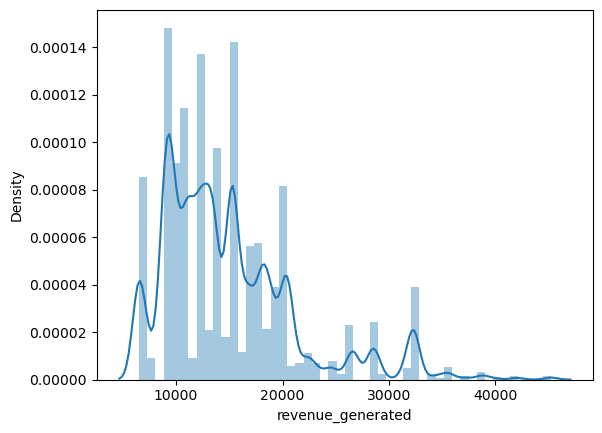

In [13]:
# Check whether outliers are present or not in "revenue_generated" column
sns.distplot(data_bookings['revenue_generated'])

<Axes: >

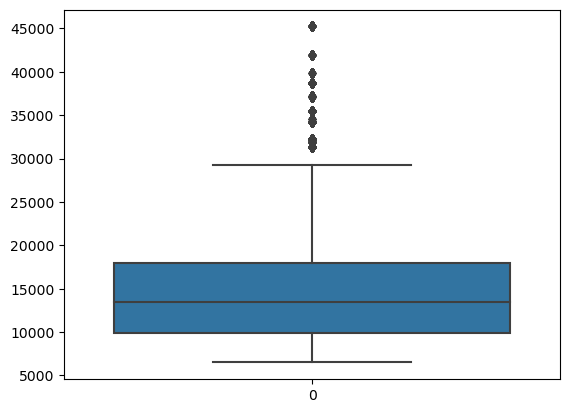

In [14]:
# To see outliers clearly 
sns.boxplot(data_bookings['revenue_generated'])

In [15]:
# Here we can see easily that outliers are present in this column i.e, revenue_generated 

In [16]:
q1= data_bookings['revenue_generated'].quantile(0.25)
q3= data_bookings['revenue_generated'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(9900.0, 18000.0, 8100.0)

In [17]:
upper_limit= q3 + 1.5 * iqr
lower_limit= q1 - 1.5 * iqr
upper_limit, lower_limit

(30150.0, -2250.0)

In [18]:
# Here we find how many outliers are present
data_bookings.loc[(data_bookings['revenue_generated'] >= upper_limit) | (data_bookings['revenue_generated'] <= lower_limit)]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,2022-04-27,2022-05-01,2022-05-07,4,RT4,others,NaN,Checked Out,38760,38760
138,May012216559RT42,16559,2022-04-11,2022-05-01,2022-05-03,2,RT4,direct offline,NaN,Cancelled,32300,12920
139,May012216559RT43,16559,2022-05-01,2022-05-01,2022-05-02,6,RT4,tripster,3.0,Checked Out,45220,45220
140,May012216559RT44,16559,2022-04-28,2022-05-01,2022-05-05,2,RT4,others,NaN,Checked Out,32300,32300
141,May012216559RT45,16559,2022-04-28,2022-05-01,2022-05-04,2,RT4,others,5.0,Checked Out,32300,32300
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [19]:
# Trim the data
new_data= data_bookings.loc[(data_bookings['revenue_generated'] <= upper_limit) & (data_bookings['revenue_generated'] >= lower_limit)]
print('old data', len(data_bookings))
print('new data', len(new_data))
print(len(data_bookings)- len(new_data))

old data 134590
new data 128306
6284


<Axes: >

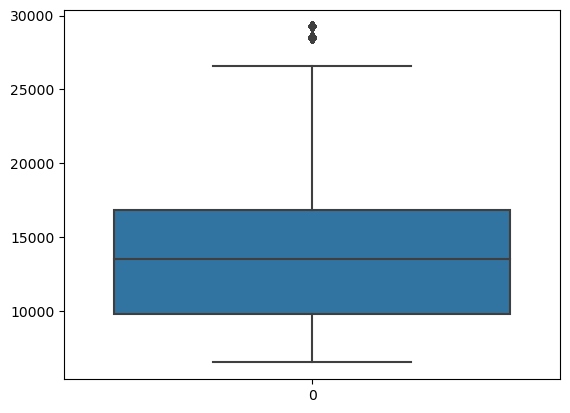

In [20]:
sns.boxplot(new_data['revenue_generated']) #Now we have data without outliers.

C:\Users\ykuma\AppData\Local\Temp\ipykernel_18728\3630197930.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['revenue_generated'])


<Axes: xlabel='revenue_generated', ylabel='Density'>

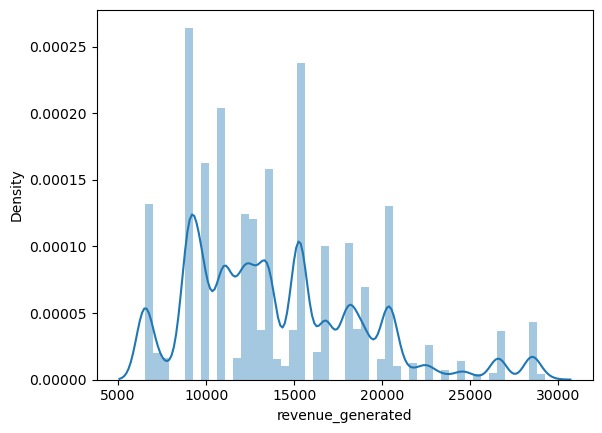

In [37]:
sns.distplot(new_data['revenue_generated']) # Here we can easily see that we don't have any outliers.

In [21]:
new_data.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,128306.000000,128306.000000,53979.000000,128306.000000,128306.000000
mean,18085.956386,2.017302,3.615073,13992.901462,11902.068454
std,1098.685498,1.004869,1.231946,4996.725488,5730.389831
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9750.000000,7200.000000
50%,18558.000000,2.000000,4.000000,13500.000000,11050.000000
75%,18563.000000,2.000000,5.000000,16830.000000,15300.000000
max,19563.000000,6.000000,5.000000,29260.000000,29260.000000


In [22]:
new_data.shape

(128306, 12)

In [23]:
new_data.revenue_realized.describe()

count    128306.000000
mean      11902.068454
std        5730.389831
min        2600.000000
25%        7200.000000
50%       11050.000000
75%       15300.000000
max       29260.000000
Name: revenue_realized, dtype: float64

<Axes: >

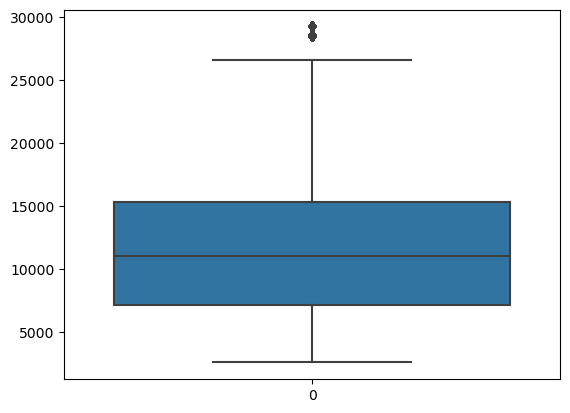

In [24]:
sns.boxplot(new_data['revenue_realized'])

C:\Users\ykuma\AppData\Local\Temp\ipykernel_18728\753602997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['revenue_realized'])


<Axes: xlabel='revenue_realized', ylabel='Density'>

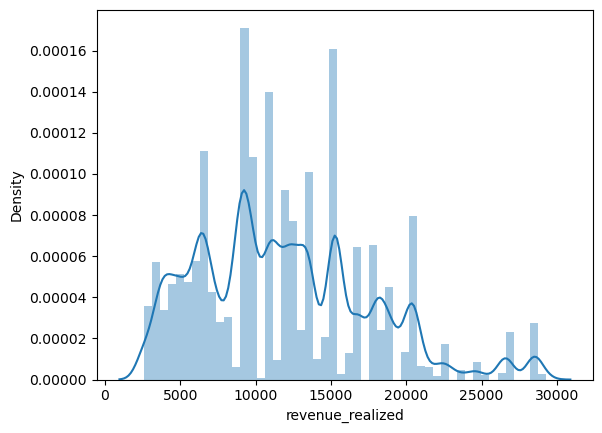

In [38]:
sns.distplot(new_data['revenue_realized']) # Also in this column we doon't have any outliers.

In [25]:
new_data[new_data.room_category=="RT4"].revenue_realized.describe()

count     9789.000000
mean     19929.344366
std       7098.550090
min       7600.000000
25%      19000.000000
50%      19000.000000
75%      26600.000000
max      29260.000000
Name: revenue_realized, dtype: float64

In [34]:
new_data.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        74327
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [35]:
#Since there are many null values in 'rating_given' column, we should not filter these values. 
#Also we should not replace this rating with a median or mean rating etc.

# Explore df_date dataframe

In [40]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [43]:
df_date.shape

(92, 4)

In [44]:
df_date.describe()

,date,mmm yy,week no,day_type
count,92,92,92,92
unique,92,3,14,2
top,01-May-22,May 22,W 19,weekeday
freq,1,31,7,65


In [46]:
df_date.isnull().sum() #There are no missing values in this dataframe

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64

In [50]:
df_date.day_type.value_counts()

day_type
weekeday    65
weekend     27
Name: count, dtype: int64

In [55]:
df_date['week no'].value_counts()

week no
W 19    7
W 20    7
W 21    7
W 22    7
W 23    7
W 24    7
W 25    7
W 26    7
W 27    7
W 28    7
W 29    7
W 30    7
W 31    7
W 32    1
Name: count, dtype: int64

In [56]:
df_date['mmm yy'].value_counts()

mmm yy
May 22    31
Jul 22    31
Jun 22    30
Name: count, dtype: int64

In [ ]:
df_date['mmm yy'].value_counts()

# Explore df_hotels dataframe

In [59]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [60]:
df_hotels.shape

(25, 4)

In [61]:
df_hotels.describe()

,property_id
count,25.000000
mean,18040.640000
std,1122.436371
min,16558.000000
25%,17558.000000
50%,17564.000000
75%,18563.000000
max,19563.000000


In [64]:
df_hotels.isnull().sum() #There are no null values in this dataframe

property_id      0
property_name    0
category         0
city             0
dtype: int64

In [67]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [69]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [76]:
df_hotels.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [75]:
df_hotels.property_id.unique()

array([16558, 16559, 16560, 16561, 16562, 16563, 17558, 17559, 17560,
       17561, 17562, 17563, 18558, 18559, 18560, 18561, 18562, 18563,
       19558, 19559, 19560, 19561, 19562, 19563, 17564], dtype=int64)

# Explore df_rooms dataframe

In [77]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [80]:
df_rooms.shape

(4, 2)

# Explore df_agg_bookings

In [81]:
df_agg_bookings.shape

(9200, 5)

In [83]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [84]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9200.000000
mean,18040.640000,14.629348,25.280000
std,1099.818325,7.591770,11.440971
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,43.000000,50.000000


In [86]:
df_agg_bookings.isnull().sum() #There are no null values in this dataframe

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [94]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [95]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum() #Total bookings per property_id

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [96]:
#bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [ ]:
#There are no bookings in which bookings are grater than capacity.

In [97]:
df_agg_bookings.capacity.max() #highest capacity

50

# Data Transformation

In [102]:
#Create 'occupancy_percentage' column
df_agg_bookings['occupancy_percentage'] = (df_agg_bookings['successful_bookings'] / df_agg_bookings['capacity']) * 100

In [103]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage
0,16559,01-May-22,RT1,25,30,83.333333
1,19562,01-May-22,RT1,28,30,93.333333
2,19563,01-May-22,RT1,23,30,76.666667
3,17558,01-May-22,RT1,13,19,68.421053
4,16558,01-May-22,RT1,18,19,94.736842


In [105]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           9200 non-null   int64  
 1   check_in_date         9200 non-null   object 
 2   room_category         9200 non-null   object 
 3   successful_bookings   9200 non-null   int64  
 4   capacity              9200 non-null   int64  
 5   occupancy_percentage  9200 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 431.4+ KB


# Insights

# 1. What is an average occupancy rate in each of the room categories?


In [122]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage
0,16559,01-May-22,RT1,25,30,83.333333
1,19562,01-May-22,RT1,28,30,93.333333
2,19563,01-May-22,RT1,23,30,76.666667
3,17558,01-May-22,RT1,13,19,68.421053
4,16558,01-May-22,RT1,18,19,94.736842


In [109]:
df_agg_bookings.groupby('room_category')['occupancy_percentage'].mean().round(2)

room_category
RT1    57.92
RT2    58.01
RT3    58.03
RT4    59.28
Name: occupancy_percentage, dtype: float64

In [116]:
#Merging two dataframes i.e., df_agg_bookings with df_rooms
df_merge = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df_merge.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_id,room_class
0,16559,01-May-22,RT1,25,30,83.333333,RT1,Standard
1,19562,01-May-22,RT1,28,30,93.333333,RT1,Standard
2,19563,01-May-22,RT1,23,30,76.666667,RT1,Standard
3,17558,01-May-22,RT1,13,19,68.421053,RT1,Standard
4,16558,01-May-22,RT1,18,19,94.736842,RT1,Standard


In [117]:
df_merge.drop("room_id",axis=1, inplace=True)
df_merge.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class
0,16559,01-May-22,RT1,25,30,83.333333,Standard
1,19562,01-May-22,RT1,28,30,93.333333,Standard
2,19563,01-May-22,RT1,23,30,76.666667,Standard
3,17558,01-May-22,RT1,13,19,68.421053,Standard
4,16558,01-May-22,RT1,18,19,94.736842,Standard


In [119]:
df_merge.groupby('room_class')['occupancy_percentage'].mean().round(2)


room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.92
Name: occupancy_percentage, dtype: float64

# 2. Print average occupancy rate per city

In [120]:
# Here again we are mering two dataframes i.e, the newly created dataframe(df_merge) with df_hotels
df_merge = pd.merge(df_merge, df_hotels, on='property_id')
df_merge.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.333333,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30,66.666667,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30,56.666667,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,04-May-22,RT1,21,30,70.000000,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,05-May-22,RT1,16,30,53.333333,Standard,Atliq Exotica,Luxury,Mumbai


In [130]:
df_merge.groupby('city')['occupancy_percentage'].mean()

city
Bangalore    56.340903
Delhi        61.521430
Hyderabad    58.121819
Mumbai       57.915820
Name: occupancy_percentage, dtype: float64

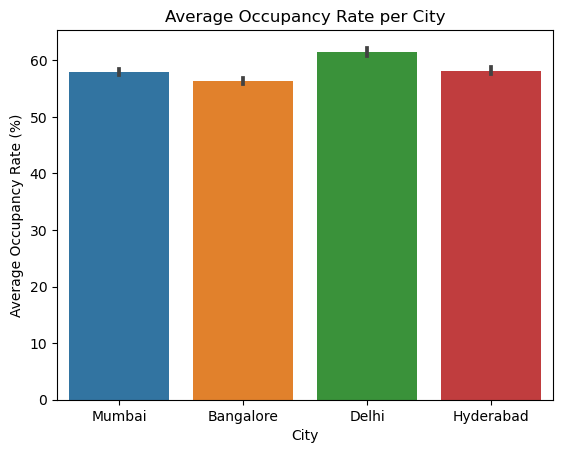

In [136]:
sns.barplot(data=df_merge,x='city', y='occupancy_percentage')

plt.title("Average Occupancy Rate per City")
plt.xlabel("City")
plt.ylabel("Average Occupancy Rate (%)")

plt.show()

In [ ]:
# Delhi hight has the highest avg. occupancy percentage.

# 3. When was the occupancy better? Weekday or Weekend?

In [137]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [138]:
df_merge.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30,83.333333,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30,66.666667,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30,56.666667,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,04-May-22,RT1,21,30,70.000000,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,05-May-22,RT1,16,30,53.333333,Standard,Atliq Exotica,Luxury,Mumbai


In [139]:
#Here we merge these two dataframes i.e., df_merge & df_date

In [141]:
df_merge= pd.merge(df_merge, df_date, left_on="check_in_date", right_on="date")
df_merge.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,16559,01-May-22,RT1,25,30,83.333333,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,85.365854,Elite,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,84.375000,Premium,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend
3,16559,01-May-22,RT4,17,18,94.444444,Presidential,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend
4,19562,01-May-22,RT1,28,30,93.333333,Standard,Atliq Bay,Luxury,Bangalore,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend


In [144]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_id           9200 non-null   int64  
 1   check_in_date         9200 non-null   object 
 2   room_category         9200 non-null   object 
 3   successful_bookings   9200 non-null   int64  
 4   capacity              9200 non-null   int64  
 5   occupancy_percentage  9200 non-null   float64
 6   room_class            9200 non-null   object 
 7   property_name         9200 non-null   object 
 8   category              9200 non-null   object 
 9   city                  9200 non-null   object 
 10  date_x                9200 non-null   object 
 11  mmm yy_x              9200 non-null   object 
 12  week no_x             9200 non-null   object 
 13  day_type_x            9200 non-null   object 
 14  date_y                9200 non-null   object 
 15  mmm yy_y             

In [145]:
df_merge.groupby("day_type_y")["occupancy_percentage"].mean().round(2)

day_type_y
weekeday    51.81
weekend     73.96
Name: occupancy_percentage, dtype: float64

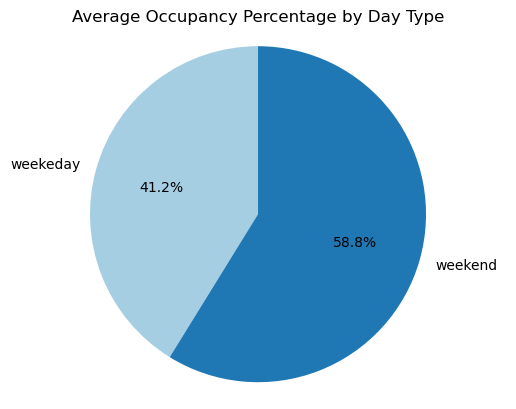

In [158]:
# Create the pie chart
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Average Occupancy Percentage by Day Type')

# Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()


# 4: In the month of June, what is the occupancy for different cities

In [174]:
df_june_22 = df_merge[df_merge["mmm yy_y"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
3100,16559,01-Jun-22,RT1,14,30,46.666667,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday,01-Jun-22,Jun 22,W 23,weekeday
3101,16559,01-Jun-22,RT2,21,41,51.219512,Elite,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday,01-Jun-22,Jun 22,W 23,weekeday
3102,16559,01-Jun-22,RT3,15,32,46.875000,Premium,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday,01-Jun-22,Jun 22,W 23,weekeday
3103,16559,01-Jun-22,RT4,8,18,44.444444,Presidential,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun 22,W 23,weekeday,01-Jun-22,Jun 22,W 23,weekeday


In [175]:
df_june_22.groupby('city')['occupancy_percentage'].mean().round(2).sort_values(ascending=False)


city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.85
Name: occupancy_percentage, dtype: float64

# 5: In the month of May, what is the occupancy for different cities

In [176]:
df_may_22 = df_merge[df_merge["mmm yy_y"]=="May 22"]
df_may_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,16559,01-May-22,RT1,25,30,83.333333,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend
1,16559,01-May-22,RT2,35,41,85.365854,Elite,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend
2,16559,01-May-22,RT3,27,32,84.375000,Premium,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend
3,16559,01-May-22,RT4,17,18,94.444444,Presidential,Atliq Exotica,Luxury,Mumbai,01-May-22,May 22,W 19,weekend,01-May-22,May 22,W 19,weekend


In [177]:
df_may_22.groupby('city')['occupancy_percentage'].mean().round(2).sort_values(ascending=False)

city
Delhi        61.85
Hyderabad    59.01
Mumbai       58.45
Bangalore    57.09
Name: occupancy_percentage, dtype: float64

# 6. Print revenue realized per city

In [181]:
new_data.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [182]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [183]:
new_dataa=pd.merge(new_data, df_hotels, on='property_id') #here we merge two data
new_dataa.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [220]:
new_dataa.groupby("city")["revenue_realized"].sum()


city
Bangalore    400348440
Delhi        284531702
Hyderabad    325232870
Mumbai       516993783
Name: revenue_realized, dtype: int64

Text(0, 0.5, 'City')

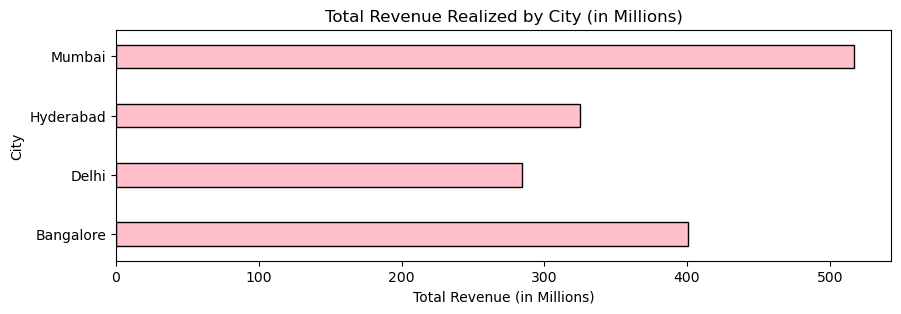

In [227]:

# Group by city and calculate the total revenue
city_revenue = new_dataa.groupby("city")["revenue_realized"].sum()

# Convert revenue to millions
city_revenue_millions = city_revenue / 1_000_000

# Create the horizontal bar chart with adjusted figure size
plt.figure(figsize=(10, 3))  # Adjust the figure size for better spacing

ax = city_revenue_millions.plot(kind="barh", color='pink', edgecolor='black', width=0.4)  # Adjust bar width

# Add title and labels
plt.title("Total Revenue Realized by City (in Millions)")
plt.xlabel("Total Revenue (in Millions)")
plt.ylabel("City")

# 7. Print month by month revenue

In [188]:
df_date.head(5)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [189]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [191]:
new_dataa.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [194]:
df_date["date"] = pd.to_datetime(df_date["date"], errors='coerce')
df_date.head()

C:\Users\ykuma\AppData\Local\Temp\ipykernel_18728\3148207323.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"], errors='coerce')


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [195]:
new_dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128306 entries, 0 to 128305
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         128306 non-null  object 
 1   property_id        128306 non-null  int64  
 2   booking_date       128306 non-null  object 
 3   check_in_date      128306 non-null  object 
 4   checkout_date      128306 non-null  object 
 5   no_guests          128306 non-null  int64  
 6   room_category      128306 non-null  object 
 7   booking_platform   128306 non-null  object 
 8   ratings_given      53979 non-null   float64
 9   booking_status     128306 non-null  object 
 10  revenue_generated  128306 non-null  int64  
 11  revenue_realized   128306 non-null  int64  
 12  property_name      128306 non-null  object 
 13  category           128306 non-null  object 
 14  city               128306 non-null  object 
dtypes: float64(1), int64(4), object(10)
memory usage: 1

In [196]:
new_dataa["check_in_date"] = pd.to_datetime(new_dataa["check_in_date"], errors='coerce')
new_dataa.head(3)

#  errors='coerce'

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [197]:
new_dataa = pd.merge(new_dataa, df_date, left_on="check_in_date", right_on="date")
new_dataa.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [198]:
new_dataa.groupby("mmm yy")["revenue_realized"].sum()


mmm yy
Jul 22    511917676
Jun 22    494600827
May 22    520588292
Name: revenue_realized, dtype: int64

# 8. Print revenue realized per hotel type

In [199]:
new_dataa.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [200]:
new_dataa.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     46357895
Atliq Grands     199655446
Atliq Bay        244334682
Atliq Blu        247595422
Atliq City       261783627
Atliq Exotica    262010474
Atliq Palace     265369249
Name: revenue_realized, dtype: int64

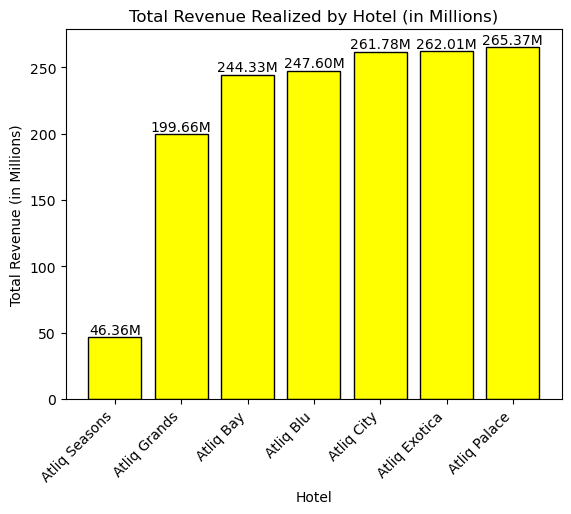

In [226]:
# Data for plotting (converted to millions)
revenue_by_hotel_millions = new_dataa.groupby("property_name")["revenue_realized"].sum().round(2).sort_values() / 1_000_000

# Create vertical bar chart

plt.bar(revenue_by_hotel_millions.index, revenue_by_hotel_millions, color='yellow', edgecolor='black')
plt.title("Total Revenue Realized by Hotel (in Millions)")
plt.xlabel("Hotel")
plt.ylabel("Total Revenue (in Millions)")
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability

# Annotate values on bars
for i, value in enumerate(revenue_by_hotel_millions):
    plt.text(i, value + 0.3, f'{value:.2f}M', ha='center', va='bottom')

plt.show()

# 9. Print average rating per city

In [212]:
new_dataa.groupby("city")["ratings_given"].mean().round(2)


city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

# 10. Print a pie chart of revenue realized per booking platform

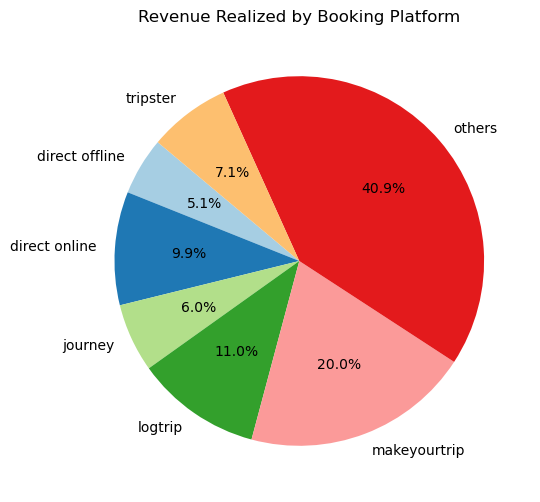

In [214]:
revenue_by_platform = new_dataa.groupby("booking_platform")["revenue_realized"].sum()
# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.pie(revenue_by_platform, labels=revenue_by_platform.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(revenue_by_platform))), startangle=140)

# Add title
plt.title("Revenue Realized by Booking Platform")

plt.show()

# Plot value counts of cities as a horizontal bar chart

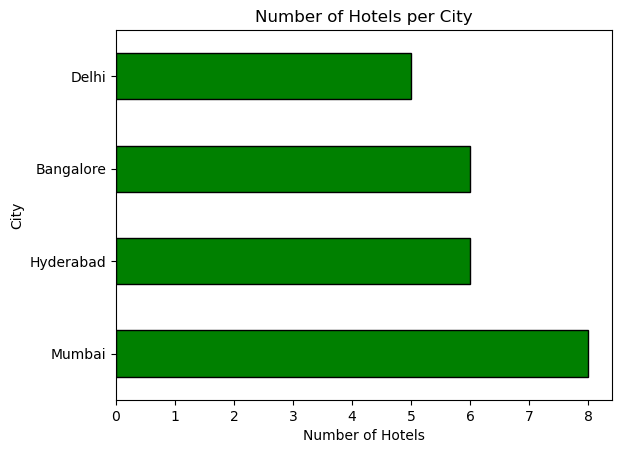

In [225]:
ax = df_hotels.city.value_counts().plot(kind="barh", color='green', edgecolor='black')

# Add title and labels
plt.title("Number of Hotels per City")
plt.xlabel("Number of Hotels")
plt.ylabel("City")

plt.show()

# Plot the value counts of booking platforms as a bar chart

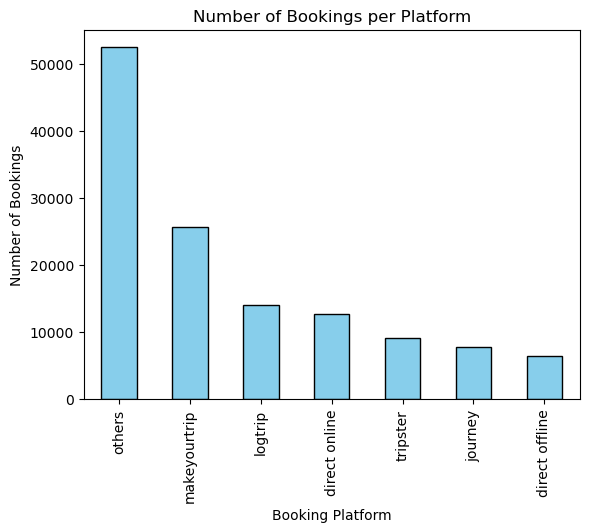

In [224]:
new_dataa.booking_platform.value_counts().plot(kind="bar", color='skyblue', edgecolor='black')

# Add a title and labels
plt.title("Number of Bookings per Platform")
plt.xlabel("Booking Platform")
plt.ylabel("Number of Bookings")

# Show the plot
plt.show()

# Insights

# 1. Average Occupancy by Room Type

1. Presidential rooms have the highest average occupancy (59.28%).
2. Standard rooms have the lowest average occupancy (57.92%).

# 2. Average Occupancy Rate per City

1. Delhi has the highest average occupancy rate (61.52%).
2. Bangalore has the lowest average occupancy rate (56.34%).

# 3.Weekday vs. Weekend Occupancy

Occupancy is significantly higher on weekends (73.96%) compared to weekdays (56.34%).

# 4. Occupancy Rates in June

1. Delhi had the highest occupancy in June (61..46%).
2. Bangalore had the lowest occupancy in June (55.85%).

# 5.Revenue Realized per City

1. Mumbai  generates the highest revenue i.e., $516,993,783
2. Delhi generates the lowest revenue i.e.,$284,531,783

# 6. Revenue by Hotel Type

1. Atliq Palace has the highest revenue ($265,369,249).
2. Atliq Seasons has the lowest revenue ($46,357,895).

# Average Rating per City

1. Delhi has the highest average rating (3.78).
2. Bangalore has the lowest average rating (3.40).

# Recommendations 

1. **Targeted Marketing for Low-Occupancy Room Types**
   - **Standard rooms** have the lowest average occupancy rate (57.92%). AtliQ Hotels can run promotional campaigns to boost bookings for these rooms, such as offering package deals or discounts for long stays to increase occupancy.
   - **Presidential rooms** have a relatively higher occupancy. Enhancing luxury services for this room type can justify premium pricing and attract more high-spending guests.
   

2. **Increase Weekday Occupancy**
   - Since the occupancy rate is significantly lower on weekdays (56.34%) compared to weekends (73.96%), AtliQ Hotels can offer **weekday-specific discounts**, business travel packages, or conference facilities to attract corporate clients during weekdays.
   - Collaborating with local businesses for corporate events or workshops can also help fill rooms during the week.
   

3. **Focus on Bangalore’s Performance**
   - **Bangalore** has the lowest average occupancy rate (56.34%) and the lowest rating (3.40). AtliQ Hotels should investigate customer feedback and focus on improving services, customer experience, or possibly renovating to improve ratings and occupancy in this region.
   - Tailoring offers or unique experiences for business travelers or tourists could help improve both ratings and occupancy.
   

4. **Revenue Optimization in Hyderabad**
   - With **Delhi** generating the lowest revenue ($284,531,783), it's important to assess whether pricing strategies or demand forecasting could be improved. The hotel could introduce flexible pricing, loyalty programs, or seasonal packages to enhance revenue.
   - Understanding local preferences and tailoring services or amenities could help increase bookings and revenue.
   

5. **Strengthen Brand Presence in Delhi**
   - Since **Delhi** has the highest average occupancy (61.52%) and the best average rating (3.78), further investments in marketing and services in this city could capitalize on its strong performance.
   - Offering exclusive services or expanding into premium offerings in Delhi could enhance the revenue stream.
   

6. **Promote Atliq Seasons for Growth**
   - Since **Atliq Seasons** generates the lowest revenue ($46,357,895), efforts can be made to boost its visibility through enhanced marketing and local partnerships.
   - Offering differentiated experiences or loyalty programs for guests at this hotel may increase both occupancy and revenue.
   

7. **Seasonal Marketing for June**
   - Given that **Delhi had the highest occupancy** (61.46%) and **Bangalore had the lowest occupancy** (55.85%) in June, the hotel can analyze why certain cities perform better or worse during specific months and tailor their marketing efforts to drive bookings during off-peak periods in the underperforming cities.
   

### Additional Suggestions:
- **Focus on Customer Experience:** Hotels should consistently gather guest feedback and act on it. Improving customer satisfaction in cities with low ratings (e.g., Bangalore) will help increase loyalty and positive reviews.

  
- **Leverage Technology and Data:** Implementing dynamic pricing models, using demand forecasting tools, and optimizing room allocation based on city demand can lead to higher occupancy and revenue.